<a href="https://colab.research.google.com/github/DawoodBhai420/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-01-10 06:29:59            666  
yamqwe/omicron-covid19-variant-daily-cases                  Omicron daily cases by country (COVID-19 variant)  432KB  2022-01-30 09:11:54          11970  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           1672  
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           1490  
iamsouravbanerjee/analytics-industry

In [2]:
! kaggle datasets download -d preetviradiya/brian-tumor-dataset

 97% 104M/107M [00:00<00:00, 103MB/s]  
100% 107M/107M [00:00<00:00, 127MB/s]


In [3]:
import os
import zipfile

local_zip = '/content/brian-tumor-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./brian-tumor-dataset')

zip_ref.close()

In [4]:
brain_tumor_images = os.path.join('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Brain Tumor')
healthy_images = os.path.join('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy')

In [5]:
print(len(os.listdir(brain_tumor_images)))
print(len(os.listdir(healthy_images)))

2513
2087


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [7]:
datagen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)
train_generator = datagen.flow_from_directory('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set',
                                              target_size = (150,150),
                                              batch_size = 256,
                                              class_mode = "binary",
                                              color_mode = "rgb",
                                              shuffle = True,
                                              seed = 123,
                                              subset = "training")
validation_generator = datagen.flow_from_directory('/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set',
                                                   target_size = (150,150),
                                                   batch_size = 8,
                                                   class_mode = "binary",
                                                   color_mode = "rgb",
                                                   shuffle = True,
                                                   seed = 123,
                                                   subset = "validation")

Found 3681 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


In [8]:
classes = validation_generator.class_indices
classes

{'Brain Tumor': 0, 'Healthy': 1}

In [9]:
import matplotlib.pyplot as plt

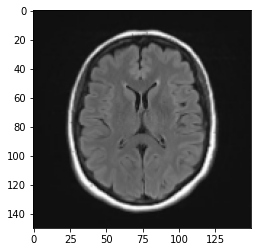

In [10]:
batch = next(validation_generator)
plt.imshow(batch[0][0])

In [11]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3), padding='same'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
                                 keras.layers.MaxPool2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128, activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(64, activation='relu'),
                                 keras.layers.BatchNormalization(),
                                 keras.layers.Dropout(0.3),
                                 keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

In [14]:
history = model.fit(train_generator,
                    verbose=2,
                    epochs=20,
                    validation_data=validation_generator)

Epoch 1/20
15/15 - 48s - loss: 0.6623 - accuracy: 0.6762 - val_loss: 0.9265 - val_accuracy: 0.6931 - 48s/epoch - 3s/step
Epoch 2/20
15/15 - 36s - loss: 0.4418 - accuracy: 0.7968 - val_loss: 0.5101 - val_accuracy: 0.7682 - 36s/epoch - 2s/step
Epoch 3/20
15/15 - 36s - loss: 0.2647 - accuracy: 0.8941 - val_loss: 0.3353 - val_accuracy: 0.8934 - 36s/epoch - 2s/step
Epoch 4/20
15/15 - 35s - loss: 0.1601 - accuracy: 0.9438 - val_loss: 0.2731 - val_accuracy: 0.9543 - 35s/epoch - 2s/step
Epoch 5/20
15/15 - 35s - loss: 0.0919 - accuracy: 0.9756 - val_loss: 0.2704 - val_accuracy: 0.9325 - 35s/epoch - 2s/step
Epoch 6/20
15/15 - 35s - loss: 0.0593 - accuracy: 0.9864 - val_loss: 0.2400 - val_accuracy: 0.9695 - 35s/epoch - 2s/step
Epoch 7/20
15/15 - 35s - loss: 0.0393 - accuracy: 0.9938 - val_loss: 0.2243 - val_accuracy: 0.9336 - 35s/epoch - 2s/step
Epoch 8/20
15/15 - 35s - loss: 0.0246 - accuracy: 0.9962 - val_loss: 0.1500 - val_accuracy: 0.9739 - 35s/epoch - 2s/step
Epoch 9/20
15/15 - 35s - loss: 0

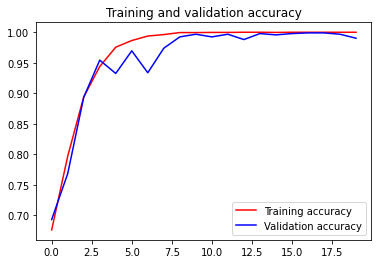

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

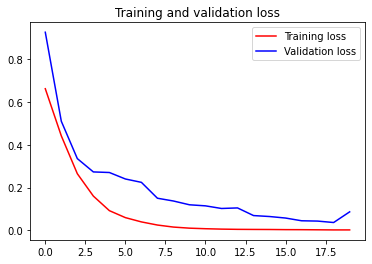

<Figure size 432x288 with 0 Axes>

In [16]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [19]:
model.save("model.h5")

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.5:
    print(fn + " is having Brain Tumor.")
  else:
    print(fn + " is healthy.")
    

KeyboardInterrupt: ignored

In [21]:
reconstructed_model = keras.models.load_model("model.h5")

In [22]:
reconstructed_model

In [24]:
path = '/content/brian-tumor-dataset/Brain Tumor Data Set/Brain Tumor Data Set/Healthy/Not Cancer  (1001).jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
pred = reconstructed_model.predict(images, batch_size=10)
print(pred)

[[1.]]
